**Churn Customer Predictor**

*Customer churn prediction is to measure why customers are leaving a business. In this tutorial we will be looking at customer churn in telecom business. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model.*

The dataset has 14 features and 10000 rows.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-modeling/Churn_Modelling.csv


In [2]:
# Importing more important libraries
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [3]:
df = pd.read_csv('../input/bank-customer-churn-modeling/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
for col in df.columns:
    print(col,':',df[col].unique())

RowNumber : [    1     2     3 ...  9998  9999 10000]
CustomerId : [15634602 15647311 15619304 ... 15584532 15682355 15628319]
Surname : ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 7

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
# Checking null values

df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

The dataset has 0 null values.

# Feature Visualization

<AxesSubplot:xlabel='Exited', ylabel='count'>

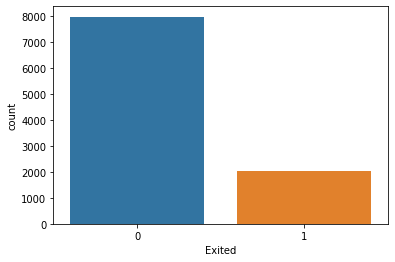

In [8]:
sns.countplot(x=df.Exited,data=df)

1 means person has exited from the company.

<AxesSubplot:xlabel='CreditScore', ylabel='Count'>

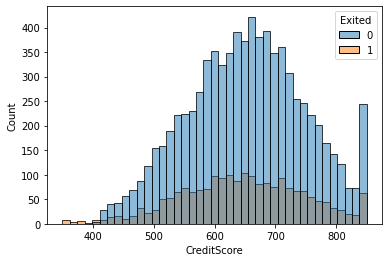

In [9]:
sns.histplot(x=df.CreditScore,data=df,hue=df.Exited)

<AxesSubplot:xlabel='Tenure', ylabel='count'>

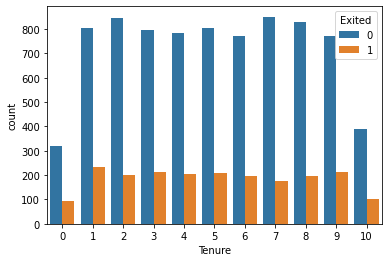

In [10]:
sns.countplot(x=df.Tenure,data=df,hue=df.Exited)

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

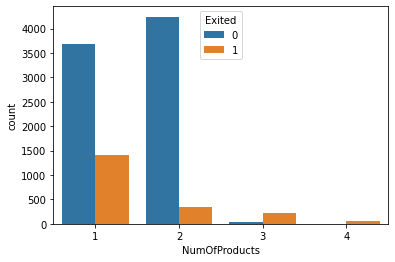

In [11]:
sns.countplot(x=df.NumOfProducts,data=df,hue=df.Exited)

# Data Preprocessing

Deleting unwanted columns

In [12]:
df.drop(['CustomerId','RowNumber','Surname'],axis=1,inplace=True)

Scaling the data so that training of the model is easy

In [13]:
from sklearn.preprocessing import MinMaxScaler

cols_to_scaled = ["CreditScore","Age","Tenure","NumOfProducts","EstimatedSalary","Balance"]
scaler=MinMaxScaler()
df[cols_to_scaled]=scaler.fit_transform(df[cols_to_scaled])

In [14]:
for col in df.columns:
    print(col,":",df[col].unique())

CreditScore : [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.

In [15]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)
df.Gender.value_counts()

0    5457
1    4543
Name: Gender, dtype: int64

One hot encoding for categorical column

In [16]:
df=pd.get_dummies(data=df)
df.head(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0


In [17]:
for col in df.columns:
    print(col,":",df[col].unique())

CreditScore : [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.

# Train test split

In [18]:
from sklearn.model_selection import train_test_split
x=df.drop('Exited',axis=1)
y=df.Exited
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [19]:
x_train.shape

(8000, 12)

In [20]:
x_test.shape

(2000, 12)

# ANN Model Building

In [21]:
model = keras.Sequential([
    keras.layers.Dense(12,input_shape=(12,),activation='relu'),
    keras.layers.Dense(6,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

model.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

model.fit(x_train,y_train,epochs=30)

2022-02-11 08:15:31.027507: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-02-11 08:15:31.179177: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
250/250 [==============================] - 1s 1ms/step - loss: 0.6236 - accuracy: 0.7400
Epoch 2/30
250/250 [==============================] - 0s 1ms/step - loss: 0.4997 - accuracy: 0.7933
Epoch 3/30
250/250 [==============================] - 0s 1ms/step - loss: 0.4682 - accuracy: 0.7995
Epoch 4/30
250/250 [==============================] - 0s 1ms/step - loss: 0.4548 - accuracy: 0.8008
Epoch 5/30
250/250 [==============================] - 0s 1ms/step - loss: 0.4444 - accuracy: 0.8054
Epoch 6/30
250/250 [==============================] - 0s 1ms/step - loss: 0.4364 - accuracy: 0.8089
Epoch 7/30
250/250 [==============================] - 0s 1ms/step - loss: 0.4307 - accuracy: 0.8095
Epoch 8/30
250/250 [==============================] - 0s 1ms/step - loss: 0.4248 - accuracy: 0.8100
Epoch 9/30
250/250 [==============================] - 0s 1ms/step - loss: 0.4189 - accuracy: 0.8121
Epoch 10/30
250/250 [==============================] - 0s 1ms/step - loss: 0.4119 - accuracy: 0.8163

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                156       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3661 - accuracy: 0.8485


[0.36608973145484924, 0.8485000133514404]

In [24]:
y_pred = model.predict(x_test)
y_pred[:10]

array([[0.10634595],
       [0.6688366 ],
       [0.33554736],
       [0.02009535],
       [0.05208185],
       [0.00868958],
       [0.37621707],
       [0.02573842],
       [0.8819016 ],
       [0.08437294]], dtype=float32)

# Performance Metrics

In [25]:
pred=[]
for element in y_pred:
    if element>0.5:
        pred.append(1)
    else:
        pred.append(0)

In [26]:
from sklearn.metrics import accuracy_score
print("Test Accuracy: ", accuracy_score(y_test, pred)*100)

Test Accuracy:  84.85000000000001


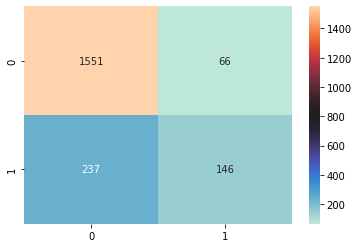

In [27]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve
cm = tf.math.confusion_matrix(labels=y_test,predictions=pred)
ax = sns.heatmap(cm,annot=True,fmt='d',cmap='icefire')
plt.show()

In [28]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1617
           1       0.69      0.38      0.49       383

    accuracy                           0.85      2000
   macro avg       0.78      0.67      0.70      2000
weighted avg       0.83      0.85      0.83      2000



ROC_AUC:  0.6701923589279053


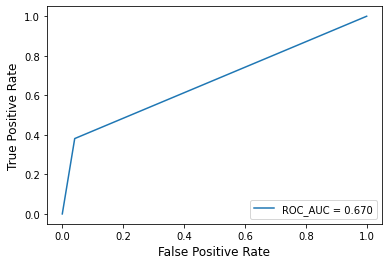

In [29]:
roc_auc = roc_auc_score(y_test, pred)
print('ROC_AUC: ', roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, pred)

plt.plot(fpr, tpr, label = 'ROC_AUC = %0.3f' % roc_auc)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()